In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
import math
from math import factorial as fact

In [2]:
f = open('string_interactions.tsv', 'r')

In [3]:
node1 = []
node2 = []

for line in f:
    
    line = line.split()
    

    node1.append(line[0])
    node2.append(line[1])
    
node2.remove('node2')
node1.remove('#node1')  

In [4]:
n1uq = set(node1)
n2uq = set(node2)
n1uq = list(n1uq)
n2uq = list(n2uq)
n1uq.extend(n2uq)
nodes = list(set(n1uq))

In [5]:
dict_ = {}

for n in nodes:
    dict_[n] = []
    

for node in nodes:
    for i in range(len(node1)):
        if  node == node1[i]:
            if node2[i] not in dict_[node]:
                dict_[node].append(node2[i])
                
for node in nodes:                
    for j in range(len(node2)):
        if node == node2[j]:
            if node1[j] not in dict_[node]:
                dict_[node].append(node1[j])

In [6]:
adj_matrix =  np.zeros((len(dict_), len(dict_)))
adj_list = dict_


In [7]:
for i in range(len(nodes)):
    
    for j in range(len(nodes)):
        if nodes[j]  in adj_list[nodes[i]]:
            
            adj_matrix[i][j] = 1


In [8]:
np.save('adj_matrix.npy', adj_matrix)    

In [9]:
from PIL import Image
import os

array = np.zeros((len(adj_matrix), len(adj_matrix)))

# Set grey value to black or white depending on x position
for x in range(len(adj_matrix)):
    for y in range(len(adj_matrix)):
        if adj_matrix[x,y] == 0:
            array[y, x] = 0
        else:
            array[y, x] = 255

img = Image.fromarray(array)
if img.mode != 'RGB':
    img = img.convert('RGB')
img.save('graph.png')

In [10]:
degree = []

for node in nodes:
    
    degree.append(len(adj_list[node]))

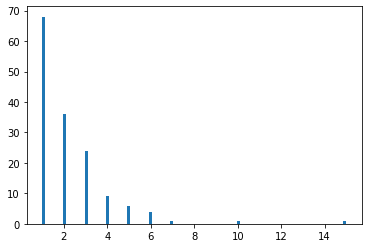

In [11]:
_ =plt.hist(degree, bins = 100)

In [12]:
deg = np.array(degree)
np.where(deg == np.max(deg))

(array([106]),)

In [13]:
nodes[112]

'BAG2'

In [14]:
graph = nx.Graph()

for node in nodes:
    graph.add_node(node, size =1)
    
    


for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix[i])):
        if adj_matrix[i,j] == 1:
            graph.add_edge(nodes[i], nodes[j])
            
pos_ = nx.spring_layout(graph, iterations=5, k = 1.5)


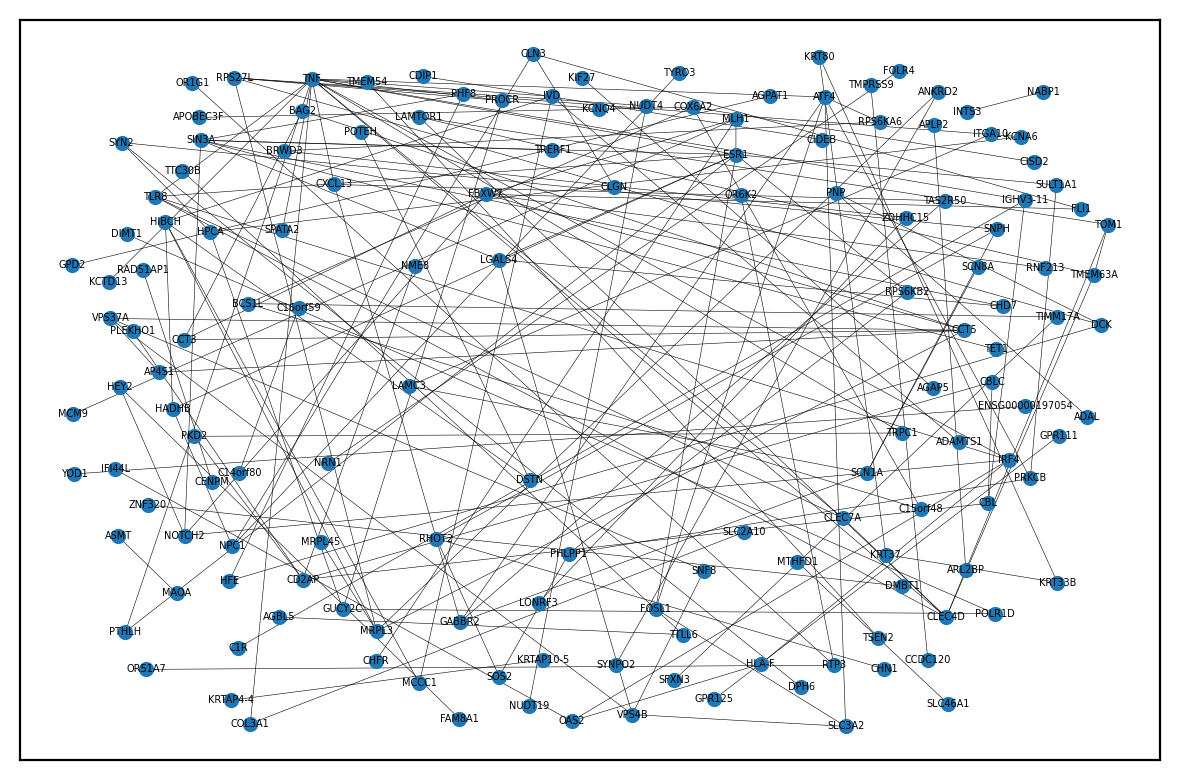

In [15]:
plt.figure(dpi = 200)
nx.draw_networkx(graph, pos_, node_size = 20,font_size =3.5,width = 0.2 )
plt.tight_layout()
#plt.show()
plt.savefig("Graph.png", format="PNG")

In [16]:
class NODE(object):
    
    def __init__(self, node):
        
        self.name = node
        self.neighbours = []
        
        
    def add_neighbours(self, neigh):
        self.neighbours.append(neigh)
        
        
    def degree(self):
        return len(self.neighbours)
    
    def clustering_coeff(self, adj_matrix, nodes):
        deg = self.degree()
        
        if deg < 2:
            cc = 0
        else:
            
            
            nghbrs = self.neighbours
        
            idx = np.where(np.array(nodes) == self.name)[0][0]
            index = []
        
            for nb in nghbrs:
                index.append(np.where(np.array(nodes) == nb)[0][0])
                
            count = 0
            
            for i in index:
                for j in index:
                    if adj_matrix[i][j] == 1:
                        count+=1
                
            
            
            
        
            E = count
            
        
        
            
            
            cc = 2*E/(deg*(deg-1))
        
        return cc
        
        
        
        
        
            
            


In [57]:
a = NODE('TNF')

In [58]:
for nod in adj_list['TNF']:
    a.add_neighbours(nod)


In [59]:
a.clustering_coeff(adj_matrix, nodes)

0.14285714285714285

In [17]:
CC = []
nod_object = []

for i in range(len(nodes)):
    nod_object.append(NODE(nodes[i]))
               
for i in range(len(nodes)):
    for nod in adj_list[nodes[i]]:
        nod_object[i].add_neighbours(nod)
        
               
               
               
               
for nod_ob in nod_object:
    
    CC.append(nod_ob.clustering_coeff(adj_matrix, nodes))

In [18]:
len(CC)

150

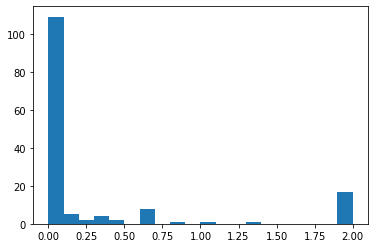

In [19]:
_ = plt.hist(CC, bins = 20)

In [21]:
nod_object[128].clustering_coeff(adj_matrix, nodes)

0.0